In [ ]:
# importação das bibliotecas e o carregamento do CSV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats 

df = pd.read_csv('campeonato-brasileiro-full.csv')


In [ ]:
# 4. verificação de informações gerais
print(df.head(10))
print(df.info(), "\n")
print(df.isnull().sum(), "\n") 

   ID  rodada        data   hora      dia       mandante    visitante  \
0   1       1  2003-03-29  16:00   Sabado        Guarani        Vasco   
1   2       1  2003-03-29  16:00   Sabado   Athletico-PR       Gremio   
2   3       1  2003-03-30  16:00  Domingo       Flamengo     Coritiba   
3   4       1  2003-03-30  16:00  Domingo          Goias     Paysandu   
4   5       1  2003-03-30  16:00  Domingo  Internacional  Ponte Preta   
5   6       1  2003-03-30  16:00  Domingo       Criciuma   Fluminense   
6   7       1  2003-03-30  16:00  Domingo      Juventude    Sao Paulo   
7   8       1  2003-03-30  16:00  Domingo      Fortaleza        Bahia   
8   9       1  2003-03-30  16:00  Domingo       Cruzeiro  Sao Caetano   
9  10       1  2003-03-30  16:00  Domingo        Vitoria  Figueirense   

  formacao_mandante formacao_visitante tecnico_mandante tecnico_visitante  \
0               NaN                NaN              NaN               NaN   
1               NaN                NaN    

In [34]:
# 5 estatísticas descritivas básicas das colunas (numéricas) do dataset
print(df.describe())

                ID       rodada  mandante_placar  visitante_placar
count  7645.000000  7645.000000      7645.000000       7645.000000
mean   3823.000000    20.196207         1.554088          1.027338
std    2207.065737    11.489249         1.234262          1.030366
min       1.000000     1.000000         0.000000          0.000000
25%    1912.000000    10.000000         1.000000          0.000000
50%    3823.000000    20.000000         1.000000          1.000000
75%    5734.000000    30.000000         2.000000          2.000000
max    7645.000000    46.000000         7.000000          7.000000


In [35]:
# 6. contagem de valores ausentes por coluna
print(df.isnull().sum())


ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64


In [38]:
# 7. Tratamento de valores ausentes
# Substituindo valores ausentes de colunas categóricas pelo valor mais frequente
categorical_cols = ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())


ID                    0
rodada                0
data                  0
hora                  0
dia                   0
mandante              0
visitante             0
formacao_mandante     0
formacao_visitante    0
tecnico_mandante      0
tecnico_visitante     0
vencedor              0
arena                 0
mandante_placar       0
visitante_placar      0
mandante_estado       0
visitante_estado      0
estado_vencedor       0
dtype: int64


In [ ]:
# 8. identificação de outliers (Z-Score) 
from scipy.stats import zscore

# alculando Z-Score (outlier |Z| > 3) para as colunas de placar
z_scores = df[['mandante_placar', 'visitante_placar']].apply(zscore)
outliers = (z_scores.abs() > 3)

print("outliers em mandante_placar e visitante_placar:")
print(outliers.sum())  # mostra quantos outliers em cada coluna


outliers em mandante_placar e visitante_placar:
mandante_placar     42
visitante_placar    30
dtype: int64


In [ ]:
# 9. remoção ou tratamento dos outliers identificados.
from scipy.stats import zscore

# calculando Z-Score
z_scores = df[['mandante_placar', 'visitante_placar']].apply(zscore)

# mantendo somente as linhas onde |Z| <= 3
df = df[(z_scores.abs() <= 3).all(axis=1)]


In [46]:
# 10. normalização das colunas rodada, mandante_placar e visitante_placar usando
df['rodada_normalizada'] = (df['rodada'] - df['rodada'].min()) / (df['rodada'].max() - df['rodada'].min())
df['mandante_placar_normalizado'] = (df['mandante_placar'] - df['mandante_placar'].min()) / (df['mandante_placar'].max() - df['mandante_placar'].min())
df['visitante_placar_normalizado'] = (df['visitante_placar'] - df['visitante_placar'].min()) / (df['visitante_placar'].max() - df['visitante_placar'].min())

print(df[['rodada', 'rodada_normalizada', 'mandante_placar', 'mandante_placar_normalizado',
          'visitante_placar', 'visitante_placar_normalizado']].head(10))


   rodada  rodada_normalizada  mandante_placar  mandante_placar_normalizado  \
0       1                 0.0                4                          0.8   
1       1                 0.0                2                          0.4   
2       1                 0.0                1                          0.2   
3       1                 0.0                2                          0.4   
4       1                 0.0                1                          0.2   
5       1                 0.0                2                          0.4   
6       1                 0.0                2                          0.4   
7       1                 0.0                0                          0.0   
8       1                 0.0                2                          0.4   
9       1                 0.0                1                          0.2   

   visitante_placar  visitante_placar_normalizado  
0                 2                      0.666667  
1                 0       

In [47]:
# 11. codificação de variáveis categóricas
categorical_cols = ['mandante_estado', 'visitante_estado', 'vencedor']

df_encoded = pd.get_dummies(df, columns=categorical_cols)

print(df_encoded.head(10))


   ID  rodada        data   hora      dia       mandante    visitante  \
0   1       1  2003-03-29  16:00   Sabado        Guarani        Vasco   
1   2       1  2003-03-29  16:00   Sabado   Athletico-PR       Gremio   
2   3       1  2003-03-30  16:00  Domingo       Flamengo     Coritiba   
3   4       1  2003-03-30  16:00  Domingo          Goias     Paysandu   
4   5       1  2003-03-30  16:00  Domingo  Internacional  Ponte Preta   
5   6       1  2003-03-30  16:00  Domingo       Criciuma   Fluminense   
6   7       1  2003-03-30  16:00  Domingo      Juventude    Sao Paulo   
7   8       1  2003-03-30  16:00  Domingo      Fortaleza        Bahia   
8   9       1  2003-03-30  16:00  Domingo       Cruzeiro  Sao Caetano   
9  10       1  2003-03-30  16:00  Domingo        Vitoria  Figueirense   

  formacao_mandante formacao_visitante      tecnico_mandante  ...  \
0           4-2-3-1            4-2-3-1  L. Venker de Menezes  ...   
1           4-2-3-1            4-2-3-1  L. Venker de Menez

In [48]:
# 12. criação de matriz de correlação (focando nos placares e rodadas)
correlation_matrix = df_encoded[['rodada_normalizada', 'mandante_placar_normalizado', 'visitante_placar_normalizado']].corr()
print(correlation_matrix)


                              rodada_normalizada  mandante_placar_normalizado  \
rodada_normalizada                      1.000000                     0.033448   
mandante_placar_normalizado             0.033448                     1.000000   
visitante_placar_normalizado            0.006218                     0.057089   

                              visitante_placar_normalizado  
rodada_normalizada                                0.006218  
mandante_placar_normalizado                       0.057089  
visitante_placar_normalizado                      1.000000  


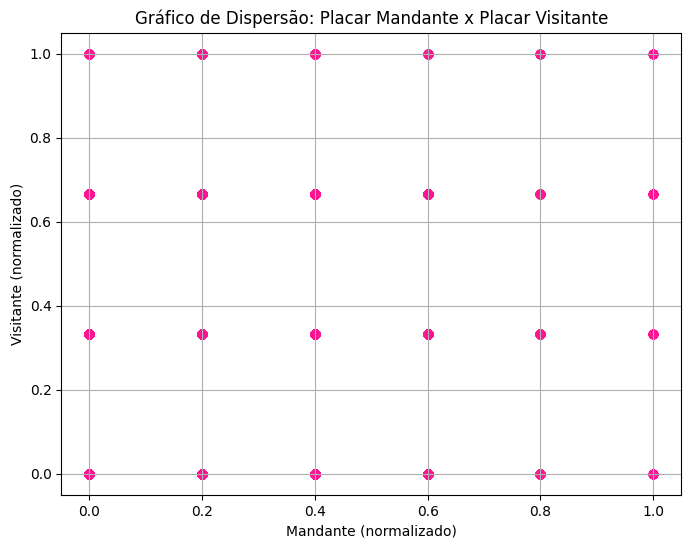

In [51]:
# 13. Gráfico de dispersão

plt.figure(figsize=(8,6))
plt.scatter(df_encoded['mandante_placar_normalizado'], df_encoded['visitante_placar_normalizado'], color='deeppink', alpha=0.6)
plt.title("Gráfico de Dispersão: Placar Mandante x Placar Visitante")
plt.xlabel("Mandante (normalizado)")
plt.ylabel("Visitante (normalizado)")
plt.grid(True)
plt.show()

In [54]:
# 14. filtragem de dados com base em uma condição: jogos onde o mandante marcou mais de 3 gols 
high_scoring_games = df_encoded[df_encoded['mandante_placar'] > 3]


print(high_scoring_games.head(10))


      ID  rodada        data   hora      dia      mandante     visitante  \
0      1       1  2003-03-29  16:00   Sabado       Guarani         Vasco   
35    48       3  2003-04-13  18:00  Domingo      Flamengo    Fluminense   
57    58       5  2003-04-20  18:00  Domingo      Cruzeiro         Goias   
67    68       6  2003-04-27  16:00  Domingo        Santos     Fortaleza   
69    70       6  2003-04-27  16:00  Domingo  Athletico-PR      Criciuma   
70    71       6  2003-04-27  18:00  Domingo      Paysandu     Sao Paulo   
74    75       7  2003-05-03  18:00   Sabado      Cruzeiro  Athletico-PR   
112  113      10  2003-05-25  16:00  Domingo  Athletico-PR      Flamengo   
130  131      11  2003-06-01  18:00  Domingo   Corinthians       Vitoria   
139  139      12  2003-06-08  16:00  Domingo  Athletico-PR   Ponte Preta   

    formacao_mandante formacao_visitante      tecnico_mandante  ...  \
0             4-2-3-1            4-2-3-1  L. Venker de Menezes  ...   
35            4-2-3-1

In [55]:
# 15. exportação do df processado para csv
df_encoded.to_csv("jogos_processados.csv", index=False)

In [57]:
# 16. Conversão da coluna de datas (data) para tipo datetime e extração de novas colunas (ano, mês).
df_encoded['data'] = pd.to_datetime(df_encoded['data'])
df_encoded['ano'] = df_encoded['data'].dt.year
df_encoded['mes'] = df_encoded['data'].dt.month

print(df_encoded[['data', 'ano', 'mes']].head(10))


        data   ano  mes
0 2003-03-29  2003    3
1 2003-03-29  2003    3
2 2003-03-30  2003    3
3 2003-03-30  2003    3
4 2003-03-30  2003    3
5 2003-03-30  2003    3
6 2003-03-30  2003    3
7 2003-03-30  2003    3
8 2003-03-30  2003    3
9 2003-03-30  2003    3


In [60]:
# 17. agrupamento dos dados

# vitórias por estado do mandante
vitorias_por_estado = df.groupby('mandante_estado')['vencedor'].apply(lambda x: (x == 'Mandante').sum())
print("Vitórias por estado do mandante:")
print(vitorias_por_estado)

# vitórias por time mandante
vitorias_por_time = df.groupby('mandante')['vencedor'].apply(lambda x: (x == 'Mandante').sum())
print("\nVitórias por time mandante:")
print(vitorias_por_time)


Vitórias por estado do mandante:
mandante_estado
AL    0
BA    0
CE    0
DF    0
GO    0
MG    0
MT    0
PA    0
PE    0
PR    0
RJ    0
RN    0
RS    0
SC    0
SP    0
Name: vencedor, dtype: int64

Vitórias por time mandante:
mandante
America-MG         0
America-RN         0
Athletico-PR       0
Atletico-GO        0
Atletico-MG        0
Avai               0
Bahia              0
Barueri            0
Botafogo-RJ        0
Bragantino         0
Brasiliense        0
CSA                0
Ceara              0
Chapecoense        0
Corinthians        0
Coritiba           0
Criciuma           0
Cruzeiro           0
Cuiaba             0
Figueirense        0
Flamengo           0
Fluminense         0
Fortaleza          0
Goias              0
Gremio             0
Gremio Prudente    0
Guarani            0
Internacional      0
Ipatinga           0
Joinville          0
Juventude          0
Nautico            0
Palmeiras          0
Parana             0
Paysandu           0
Ponte Preta        0
Portugue

In [63]:
# 18. criação de colunas derivadas (ex.: diferença de gols = mandante_placar - visitante_placar).
df_encoded['diferenca_gols'] = df_encoded['mandante_placar'] - df_encoded['visitante_placar']

print(df_encoded[['mandante_placar', 'visitante_placar', 'diferenca_gols']].head(10))


   mandante_placar  visitante_placar  diferenca_gols
0                4                 2               2
1                2                 0               2
2                1                 1               0
3                2                 2               0
4                1                 1               0
5                2                 0               2
6                2                 2               0
7                0                 0               0
8                2                 2               0
9                1                 1               0


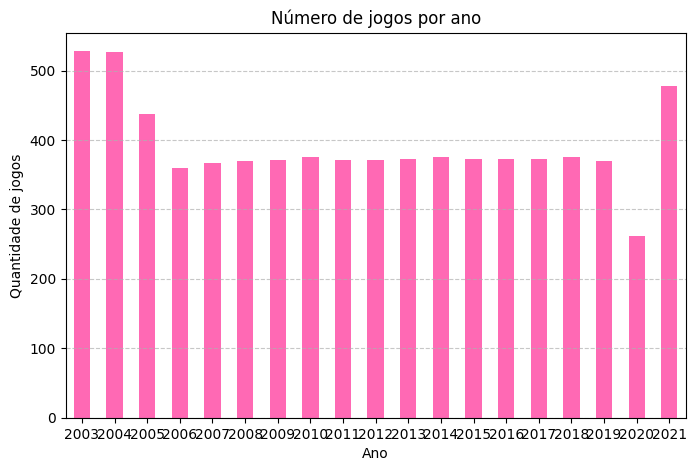

In [72]:
# 19. gráfico: número de jogos por ano
jogos_por_ano = df_encoded['ano'].value_counts().sort_index()

plt.figure(figsize=(8,5))
jogos_por_ano.plot(kind='bar', color='hotpink')
plt.title("Número de jogos por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de jogos")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


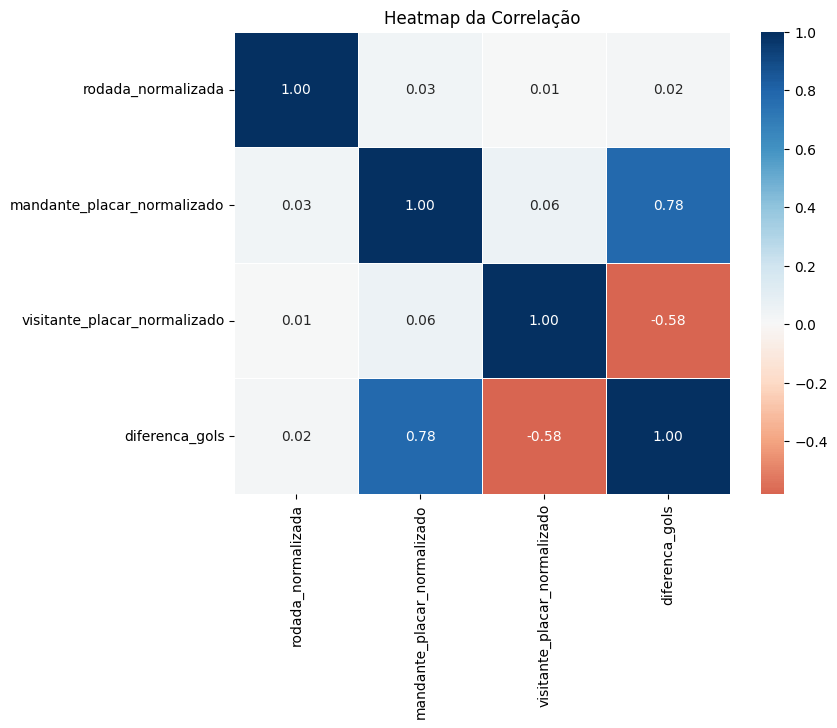

In [ ]:
# 20. heatmap da correlação com cores rosa e azul
import seaborn as sns
import matplotlib.pyplot as plt

cols_corr = ['rodada_normalizada', 'mandante_placar_normalizado', 'visitante_placar_normalizado', 'diferenca_gols']

# matriz de correlação
corr_matrix = df_encoded[cols_corr].corr()

# lotando o heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True,
    cmap='RdBu',
    center=0,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white'
)
plt.title("Heatmap da Correlação")
plt.show()
